## MNIST Keras

### Steps

1. Import packages
2. Load the data
3. Understanding the image data format
4. Preprocessing the image data
5. Build the model
6. Compile the model
7. Train the model
8. Plot the accuracy of the model
9. Plot the accuracy of the training and validation set
10. Accuracy of training and validation with loss
11. Evaluating the model

Using TensorFlow backend.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(60000, 784)
(10000, 784)
(60000,)
(10000,)
[5 0 4 1 9 2 1 3 1 4]
(60000, 10)
(10000, 10)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.1831

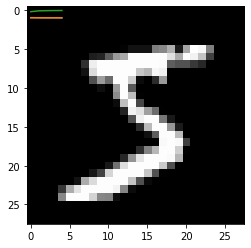

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Understand the image data format
X_train[0].shape

# Show image
plt.imshow(X_train[0], cmap='gray')

# Preprocessing - make sure the image is same WxH
image_height, image_width = 28, 28

# Reshape the data
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)

print(X_train.shape)
print(X_test.shape)

# Convert to float32 so we can rescale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Scale the data (normalize)
X_train /= 255.0
X_test /= 255.0

'''
    Remember the big picture is that for the training set, we have the images, so we've just converted, 
    or reshaped our images to being of a single layer with 784 nodes.

    Now our output is going to be 10 different classes, so one for each digit. So let's see what 
    the shape of our output is currently. So if I type the y_train.shape, I can see that my output is 
    in fact a one dimensional array, and that's the case for my test data too.
'''

# Check shape
print(y_train.shape)
print(y_test.shape)
print(y_train[0:10])

# Make sure our output classes are binned
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

# Check
print(y_train.shape)
print(y_test.shape)

# Build the model
model = Sequential()

# Create input (first) fully connected layer so we have to include input_shape()
model.add(Dense(512, activation='relu', input_shape=(784,))) # 512 output nodes

# Add dense layer with a relu activation function
model.add(Dense(512, activation='relu')) # 512 output nodes

# Add a dense layer with a softmax activation function (used for classification)
model.add(Dense(10,activation='softmax')) # 10 output nodes - classification

# Compile the model using an adam optimizer
model.compile(optimizer='adam', # go-to optimizer
              loss='categorical_crossentropy', # crossentropy for multiple categories > 2; output = 10 bins/categories
              metrics=['accuracy']) # metric used

# Model summary
print(model.summary())

'''
    How are the parameters calculated?

    784 pixels * 512 total nodes after termination + bias (total nodes in layer)
    512 pixels * 512 total nodes after termination + bias (total nodes in layer)
    512 pixels * 10 output nodes after termination + bias (total nodes in layer)
'''

# Train the model
# Fit the model with a validation dataset with 20 epochs
dense_model = model.fit(X_train,
                        y_train,
                        epochs=5,
                        validation_data=(X_test, y_test))

# Evaluate
error_rate = model.evaluate(X_test, # features
                            y_test) # expected output
print(error_rate)

# Save the model
model.save('dense_model.h5')

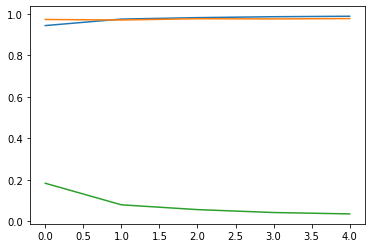

In [5]:
# Plot the accuracy
plt.plot(dense_model.history['acc']) # blue

# Validation accuracy (orange)
plt.plot(dense_model.history['val_acc']) # orange

# Add loss (green)
plt.plot(dense_model.history['loss']) # green

plt.show() 